# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix



## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
# (1) # Your Code goes here:

# Load the dataset "raw_20news.csv" into a dataframe "news_raw"
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path)
# Display the basic information about the dataset, including the number of columns and rows, the data type and the memory usage.
news_raw.info()
# Display a table of details regarding each column, including the standard deviation, mean, minimum and maximum of each column.
news_raw.describe()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


(2) ***Your answer goes here:***

The dataset contains 2129 rows and 521 columns. There are total 2129 samples collected and how many times each of total 520 words appears in each sample are counted. The minimum of the count is 1(due to 1 is added to all words counted), the maximum can go up to more than 500. All 2129 samples are classified into 5 classes. The last column "class" shows which class the sample belongs to.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [3]:
# (1) # Your Code goes here:

# Display the names of first, second and third attribute
print(news_raw.columns[0],news_raw.columns[1],news_raw.columns[2])

w1_aaa w2_pins w3_kmr


(2) ***Your answer goes here:***

The outputs show the names of the first three attributes in the dataset. The index here starts from 0, so news_raw.columns[0] gives the name of the 1st attribute and news_raw.columns[1] gives the name of the 2nd attribute and so on.

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset **A**. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 

1. [Text] Mention anything peculiar you observe in the Data.

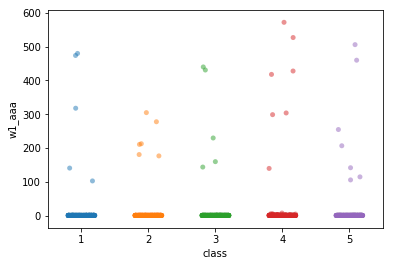

In [4]:
# (1) # Your Code goes here:

# Display the stripplot of the first attribute "w1_aaa"
''' 
The x axis is "class", the y axis is "w1_aaa", we can see how the data is distributed among the 5 classes
"jitter" allows the data in the same place to be scattered a little bit, so we can see where the data distribution is the densest.
"alpha" allows each dot appears in the plot to be transparent to some degree, so we can tell the area where data is gathered by 
seeing which part has deeper color than the other areas. 
'''
ax = sns.stripplot(x = news_raw['class'] ,y = news_raw[news_raw.columns[0]], jitter = 0.2, alpha = 0.5)


(2) ***Your answer goes here:***

The majority of the data is distributed around 1. Each class has small number of dots placed between 100 to 600.  

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

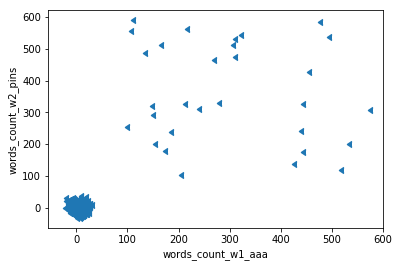

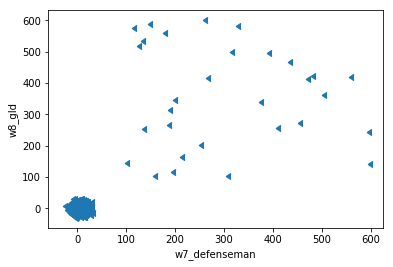

In [5]:
# (1) # Your Code goes here:

# The plot of the first and the second attribute
scatter_jitter(news_raw['w1_aaa'],news_raw['w2_pins'],jitter = 0.2)
plt.xlabel('words_count_w1_aaa')
plt.ylabel('words_count_w2_pins')
plt.show()
scatter_jitter(news_raw[news_raw.columns[65]],news_raw[news_raw.columns[75]],jitter = 0.2)
plt.xlabel(news_raw.columns[6])
plt.ylabel(news_raw.columns[7])
plt.show()

(2) ***Your answer goes here:***

The plot increases the possibility of the dataset containing outliers. We can see clearly for one pair of attributes where the majority data is gathered. All those single dots placed at distance areas can be treated as outliers because they differ a lot from the majority data in this dataset. We can also use "boxplot" to confirm this. The boxplot allows us to visualize the distribution of data for each attribute. The code for the 1st attribute would be "sns.boxplot(x = news_raw['w1_aaa'])".

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***
After visualise the scaatter plot in Question 1.4, we can see that the outliers are pretty obvious which can be distinguished as they all lies beyond 100 and all the inliers are gathered around the lower left corner. So I set the boundary to be 100, all the samples which contain counts that are greater than 100 should be removed from the original dataset and the rest of data should go into "news_clean".

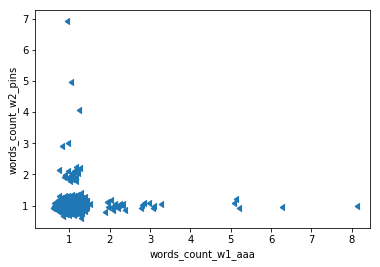

(2093, 521)


In [6]:
# (2) # Your Code goes here:

# remove all the outliers that are greater than 100 in the "news_raw" and assign the new dataset to "news_clean"
news_clean = news_raw[~news_raw[news_raw > 100].any(1)]
# Plot the distribution of data for the 1st and 2nd attributes in the "clean" dataset
scatter_jitter(news_clean['w1_aaa'],news_clean['w2_pins'],jitter = 0.5)
plt.xlabel('words_count_w1_aaa')
plt.ylabel('words_count_w2_pins')
plt.show()
print(news_clean.shape)

(3) ***Your answer goes here:***

There are 2093 samples in the "clean" dataset and 63 samples from the "raw" dataset have been classified as outliers.

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

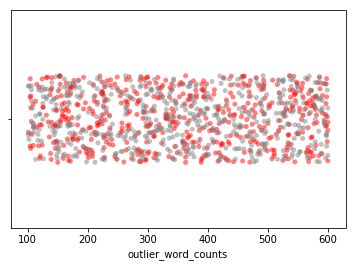

In [7]:
# (1) # Your Code goes here:

# Put all the samples that contain ouliers into dataframe "outliers"
outliers = news_raw[news_raw[news_raw > 100].any(1)]

# The stripplot for two randomly picked outliers(exclude the last column "class")

ax = sns.stripplot(x = outliers.iloc[3][0:520], jitter = 0.2, alpha = 0.5, color = 'red')
ax = sns.stripplot(x = outliers.iloc[6][0:520], jitter = 0.2, alpha = 0.5, color = 'gray')
plt.xlabel('outlier_word_counts')
plt.show()


Text(0.5,0,'inlier_word_counts')

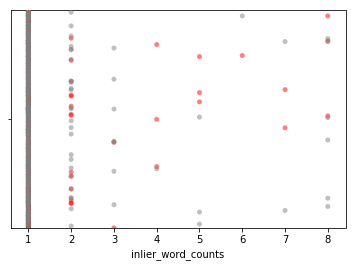

In [8]:
# The stripplot for two randomly picked inliers(exclude the last column "class")
ax = sns.stripplot(x = news_clean.iloc[7][0:520], jitter = 0.5, alpha = 0.5, color = 'red')
ax = sns.stripplot(x = news_clean.iloc[6][0:520], jitter = 0.5, alpha = 0.5, color = 'gray')
plt.xlabel('inlier_word_counts')

(2) ***Your answer goes here:***

As can be observed from the plot, the outliers concentrate in the area between 100 to 600 and inliners are mostly placed below 10. Due to the significant difference between the outliers and the inliners, it is crucial to remove this outliers. We should do this to the whole dataset instead of just the training set.

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [9]:
# Your Code goes here:
# Load "test_20news.csv" into news_test
data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path)
# Load "train_20news" into news_train
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path)

# The information summary table for the training set
news_train.describe()
# The information summary table for the testing set
news_test.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***
1. The asssumption is made that every attribute is independent of each other.
2. If there are hundreds of attributes, we can not compute hundreds of conditional probabilities nested together. With this assumption, we can compute the conditional probability of each attribute given a class independently and then multiply them together.

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset A. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

Text(0,0.5,'words_count_w273_tek')

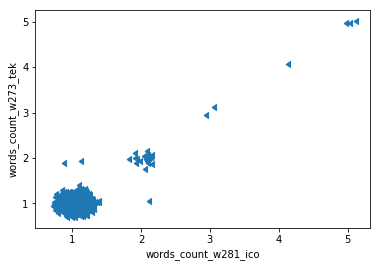

In [10]:
# (1) # Your Code goes here:
scatter_jitter(news_clean['w281_ico'],news_clean['w273_tek'],jitter = 0.5)
plt.xlabel('words_count_w281_ico')
plt.ylabel('words_count_w273_tek')

(2) ***Your answer goes here:***

The counts of these two words lie along the diagonal axis which implies they have the same count in most samples. They seem to appear at the same time which shows there might be some dependency between the apperance of the two words. In Naive Bayes, the assumption is made that each attribute contributes independently to the results. And in this question, this is not the case, so by using the Naive Bayes methods here we are not going to get accurate results. 

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

Using a DummyClassifier generates predictions by respecting the training set's class distribution. The accuracy of this DummyClassifier will be our baseline.

In [11]:
# (2) # Your Code goes here:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy="stratified", random_state = 100)
news_clean_y = news_clean['class']
news_clean_x = news_clean[news_clean.columns[0:520]]
news_train_x = news_train[news_train.columns[0:520]]
news_train_y = news_train['class']
dummy_classifier.fit(news_clean_x, news_clean_y)
baseline_pred = dummy_classifier.predict(news_train_x)
acc_base = accuracy_score(news_train_y, baseline_pred)
print("The classification accuracy of the baseline is:", acc_base)

The classification accuracy of the baseline is: 0.2120057170080991


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [12]:
# (1) # Your Code goes here:
# Fit a Gaussian Naive Bayes model to the cleaned dataset
gnb = GaussianNB()
news_clean_y = news_clean['class']
news_clean_x = news_clean[news_clean.columns[0:520]]
model = gnb.fit(news_clean_x, news_clean_y)


The accuracy is: 0.8832777513101477


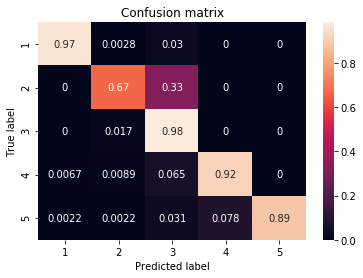

In [13]:
# (2) # Your Code goes here:
# calculate the accuracy of the model
news_train_x = news_train[news_train.columns[0:520]]
news_train_y = news_train['class']
pred = gnb.predict(news_train_x)
acc = accuracy_score(news_train_y, pred)
print("The accuracy is:",acc)
cm = confusion_matrix(news_train_y,pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# plot the Confusion Matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, classes=['1', '2','3','4','5'], title='Confusion matrix')

(3) ***Your answer goes here:***
There accuracy achieved 88% which is reasonable to use.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

In the perfect condition, the fives blocks lie on the diagonal line should have the lightest color and all the other blocks should be dark. In this case, the accuracy of 'class 1' being classified correctly is 97%, 'class 2' is the worst which only has 67%, 'class 3' is the best 98%, 'class 4' is 92% and 'class 5' achieves 89%. As shown in the confusion metrix, all the 'class 2' samples that have not been classified correctly goes into 'class 3' which is a major problem that need to be tackled with if we want to improve the accuracy of this classifier.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with the training data/baseline.

The accuracy is: 0.8203125


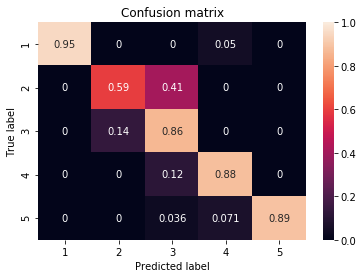

In [14]:
# (1) # Your Code goes here:
news_test_x = news_test[news_test.columns[0:520]]
news_test_y = news_test['class']
test_pred = gnb.predict(news_test_x)
acc = accuracy_score(news_test_y, test_pred)
print("The accuracy is:",acc)
cm = confusion_matrix(news_test_y,test_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, classes=['1', '2','3','4','5'], title='Confusion matrix')

In [15]:
# (2) # Your Code goes here:
baseline_pred = dummy_classifier.predict(news_test_x)
accuracy_score(news_test_y, baseline_pred)

0.203125

(3) ***Your answer goes here:***

The accuracy of the GNB model for training dataset is 0.88 higher than 0.82 of the testing dataset. The accuracy of the baseline for training dataset is 0.21 which is also higher than 0.20 of the testing set. Both models have a slightly better performance on training set.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

The accuracy is: 0.171875


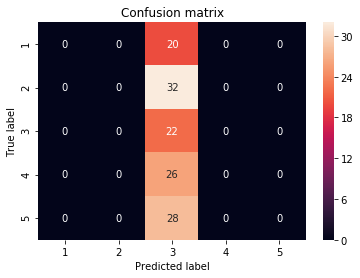

In [16]:
# (1) # Your Code goes here:
news_raw_x = news_raw[news_raw.columns[0:520]]
news_raw_y = news_raw['class']
model_raw = gnb.fit(news_raw_x, news_raw_y)
pred = gnb.predict(news_test_x)
acc = accuracy_score(news_test_y, pred)
print("The accuracy is:",acc)
cm = confusion_matrix(news_test_y,pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, classes=['1', '2','3','4','5'], title='Confusion matrix')

(2) ***Your answer goes here:***

The accuracy based on the model trained by raw dataset is much worse than the model trained on clean dataset. This proves the importance of removing outliers before we fit the data into the classifier. After the outliers are removed, we can achieve a more accurate result.

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

When using Gaussian Naive Bayes we assume that features follow a normal distribution. In our case, we count how many times each word occurs, the data points are discrete, so the Multinomial Naive Bayes can be a better approach here. Another method is Bernoulli Naive Bayes. The binomial model is useful if your feature vectors are binary. For example, we only concern whether the word shows up in the document or not.